In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

<Axes: title={'center': 'profit after half a year'}, xlabel='gained profit', ylabel='Frequency'>

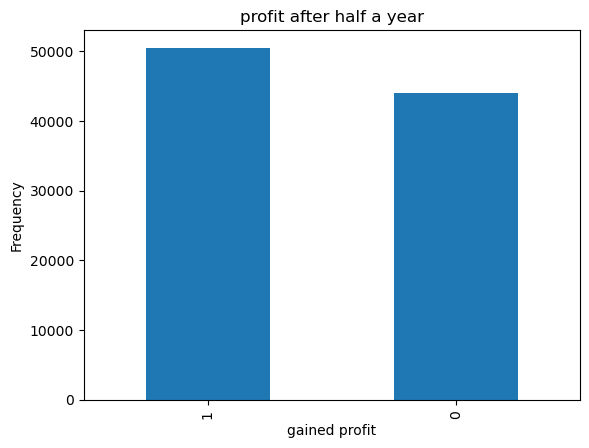

In [3]:
df = pd.read_csv("processedData.csv")
df.dropna(inplace=True)

df['26w%'] = df['26w%'].apply(lambda x: 0 if x<0  else 1)
frequency = df['26w%'].value_counts()
frequency.head(50)
frequency.plot(kind='bar',title="profit after half a year", xlabel="gained profit", ylabel="Frequency")


In [4]:
df.columns

Index(['Type', 'Insider_Amount', 'Industry', 'ΔOwn', 'Sector', 'Subsector',
       '-8w%', '-4w%', '-2w%', '-1w%', '26w%'],
      dtype='object')

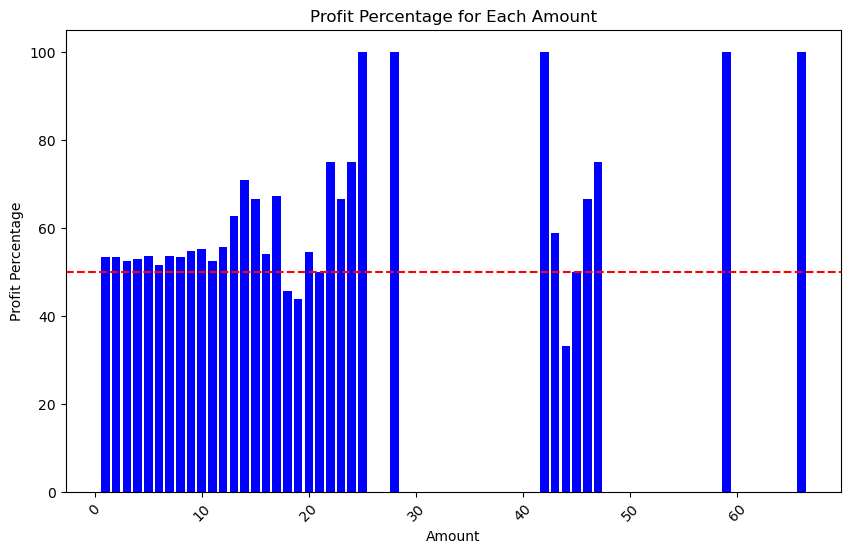

In [5]:
profit_percentage_by_amount = df.groupby('Insider_Amount')['26w%'].mean() * 100

# If you want the result as a DataFrame
result_df = profit_percentage_by_amount.reset_index(name='profit_percentage')


result_df = result_df.sort_values(by='Insider_Amount')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(result_df['Insider_Amount'], result_df['profit_percentage'], color='blue')
plt.xlabel('Amount')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage for Each Amount')
plt.axhline(y=50, color='red', linestyle='--', label='50% Mark')
plt.xticks(rotation=45)
plt.show()

In [6]:

# df.drop('Sector', axis=1, inplace=True)

df.drop('-8w%', axis=1, inplace=True)
df.drop('-4w%', axis=1, inplace=True)
df.drop('-2w%', axis=1, inplace=True)
df.drop('-1w%', axis=1, inplace=True)


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['SectorEncoded'] = label_encoder.fit_transform(df['Sector'])
df.drop('Sector', axis=1, inplace=True)
df.drop('Type', axis=1, inplace=True)
df.drop('Subsector', axis=1, inplace=True)
df.drop('Industry', axis=1, inplace=True)
#df.drop('ΔOwn', axis=1, inplace=True)

In [7]:
df.columns

Index(['Insider_Amount', 'ΔOwn', '26w%', 'SectorEncoded'], dtype='object')

In [8]:
#importing ML librairs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [9]:

#12w% is the target because it is the result after half year and we want to see whether or not we can predict if teh stock will go up given the previous weeks 
# of data and industry
X = df.drop("26w%",axis=1)
y = df["26w%"].astype('int')

#Splits teh data into training, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [10]:
# Initialize the Naïve Bayes model
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {round(accuracy*100)}%")


Accuracy: 54%


In [11]:
#save the model 
import joblib
joblib.dump(model, 'naive_bayes_model.joblib')

['naive_bayes_model.joblib']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {round(accuracy*100)}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 51%
Confusion Matrix:
[[2060 2324]
 [2334 2733]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      4384
           1       0.54      0.54      0.54      5067

    accuracy                           0.51      9451
   macro avg       0.50      0.50      0.50      9451
weighted avg       0.51      0.51      0.51      9451



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X = df[['Insider_Amount', 'ΔOwn', 'SectorEncoded']]
y = df['26w%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Now you can save the trained SVM model for future use
joblib.dump(svm_model, 'svm_model.joblib')

Accuracy: 0.5361337424611152


['svm_model.joblib']

In [15]:
len(df)

94508